In [1]:
import pandas as pd


filepath = 'input/news_data.csv'
df = pd.read_csv(filepath, encoding='latin-1')


df['CATEGORY'] = df.CATEGORY.map({'b': 1, 't': 2, 'e': 3, 'm': 4})
print(df.iloc[0])
sentences = df['TITLE']
y = df['CATEGORY']
# Not that need 
# 
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=1000)

ID                                                           1
TITLE        Fed official says weak data caused by weather,...
URL          http://www.latimes.com/business/money/la-fi-mo...
PUBLISHER                                    Los Angeles Times
CATEGORY                                                     1
STORY                            ddUyU0VZz0BRneMioxUPQVP6sIxvM
HOSTNAME                                       www.latimes.com
TIMESTAMP                                             1.39e+12
Name: 0, dtype: object


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [3]:
import warnings

warnings.filterwarnings("ignore")  # Ignoring unnecessory warnings

import h5py
from keras.models import Sequential

from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                15340     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 15,351
Trainable params: 15,351
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.models import load_model
try:
    model = load_model('my_model.h5')
    print("Loaded model from disk")
except:
    history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

    # Creates a HDF5 file 'my_model.h5'
    model.save('my_model.h5')
    
    # Deletes the existing model
    del model  
    
    # Returns a compiled model identical to the previous one
    model = load_model('my_model.h5')
    print("Saved data")

Saved data


In [19]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9399


In [20]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9600


In [21]:
pred = model.predict(X_test)

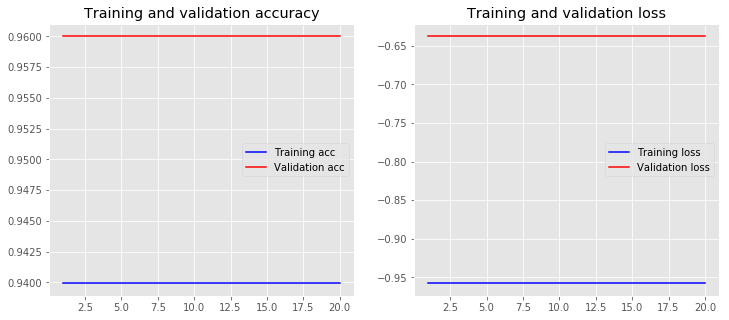

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    
plot_history(history)